In [53]:
import pandas as pd

# Load the Dataset

In [54]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')

In [55]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Descriptive Statistics
## Headline Length Analysis
we  can calculate the length of each headline and then obtain basic statistics such as mean, median, and mode.

In [56]:
# Calculate headline length
data['headline_length'] = data['headline'].apply(len)

# Descriptive statistics for headline length
headline_length_stats = data['headline_length'].describe()
headline_length_stats


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

## Count the Number of Articles per Publisher
Identify the most active publishers by counting the number of articles they have published.

In [66]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
display(publisher_counts)


publisher
Paul Quintaro                                     228373
Lisa Levin                                        186979
Benzinga Newsdesk                                 150484
Charles Gross                                      96732
Monica Gerson                                      82380
Eddie Staley                                       57254
Hal Lindon                                         49047
ETF Professor                                      28489
Juan Lopez                                         28438
Benzinga Staff                                     28114
Vick Meyer                                         24826
webmaster                                          20313
Benzinga_Newsdesk                                  19410
Zacks                                              19390
Jayson Derrick                                     19050
Allie Wickman                                      18317
Shanthi Rexaline                                   16640
Craig Jones          

## Publication Date Analysis
Analyze trends over time by examining the publication dates.

<Axes: title={'center': 'Articles Published Over Time'}, xlabel='date_only'>

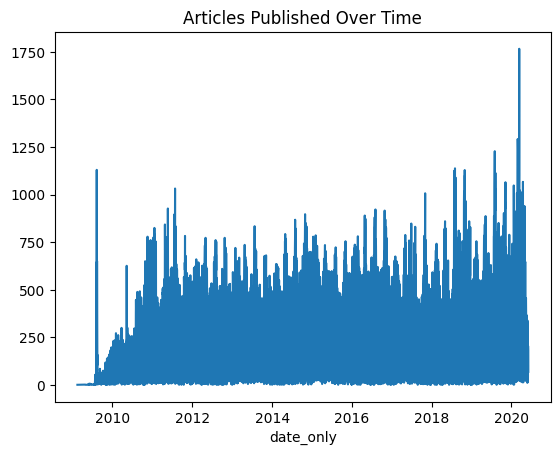

In [58]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Extract the date only (without time) for better analysis
data['date_only'] = data['date'].dt.date

# Count the number of articles per day
daily_counts = data['date_only'].value_counts().sort_index()

# Display the trend
daily_counts.plot(kind='line', title='Articles Published Over Time')


# Perform Sentiment Analysis on Headlines


Perform sentiment analysis on the headline text to categorize the sentiment as positive, negative, or neutral.

In [59]:
from textblob import TextBlob



# Define a function for sentiment analysis and categorization
def analyze_sentiment(headline):
    blob = TextBlob(headline)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Categorize sentiment based on polarity
    if polarity > 0.3:
        sentiment_category = "Positive"
    elif polarity < -0.3:
        sentiment_category = "Negative"
    else:
        sentiment_category = "Neutral"
    
    return polarity, subjectivity, sentiment_category

# Apply the function to the first 100 headlines
sentiment_analysis = []
for headline in data['headline'].head(100):
    polarity, subjectivity, category = analyze_sentiment(headline)
    sentiment_analysis.append({
        "Headline": headline,
        "Polarity": round(polarity, 2),
        "Subjectivity": round(subjectivity, 2),
        "Sentiment Category": category
    })

# Convert the results into a DataFrame
sentiment_data = pd.DataFrame(sentiment_analysis)


# display it in a more readable format using display()
from IPython.display import display
display(sentiment_data)


,Headline,Polarity,Subjectivity,Sentiment Category
0,Stocks That Hit 52-Week Highs On Friday,0.00,0.00,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.00,0.00,Neutral
2,71 Biggest Movers From Friday,0.00,0.00,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.00,0.00,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.00,0.00,Neutral
5,"CFRA Maintains Hold on Agilent Technologies, L...",0.00,0.00,Neutral
6,"UBS Maintains Neutral on Agilent Technologies,...",0.00,0.00,Neutral
7,Agilent Technologies shares are trading higher...,0.25,0.50,Neutral
8,Wells Fargo Maintains Overweight on Agilent Te...,0.00,0.00,Neutral
9,10 Biggest Price Target Changes For Friday,0.00,0.00,Neutral


# Extract Common Keywords or Topics

Use NLP techniques to identify common keywords, phrases, or topics within the headline text.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to extract common words
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(data['headline'].head(500))

# Get the top keywords and their frequencies
top_keywords = vectorizer.get_feature_names_out()
keyword_frequencies = X.toarray().sum(axis=0)

# Create a DataFrame with keywords and their frequencies
keywords_df = pd.DataFrame({
    "Top Keywords": top_keywords,
    "Frequency": keyword_frequencies
})

# Sort by frequency for better readability
keywords_df = keywords_df.sort_values(by="Frequency", ascending=False)



# use display() for a better format

display(keywords_df)


,Top Keywords,Frequency
0,agilent,285
8,technologies,151
9,vs,116
2,est,108
6,stocks,80
1,eps,79
4,sales,66
7,target,48
5,shares,47
3,price,47


# Analyze Publication Frequency Over Time

Analyze how the publication frequency changes over time, focusing on spikes related to specific events.

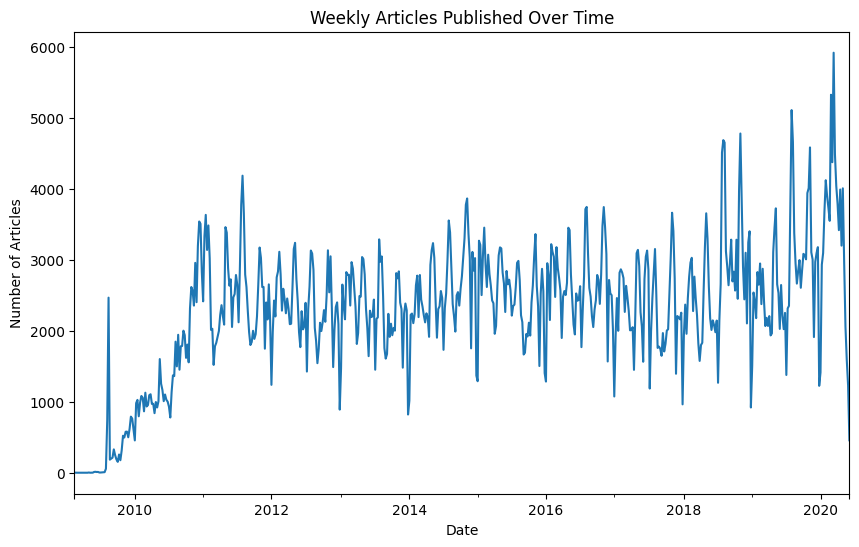

In [61]:
# Convert the date column to datetime, ensuring it handles the timezone correctly
data['date'] = pd.to_datetime(data['date'])

# Count the number of articles per day
daily_counts = data['date'].value_counts().sort_index()

# Set the date as the index to ensure it's a DatetimeIndex with timezone awareness
daily_counts.index = pd.to_datetime(daily_counts.index)

# Resample the daily counts to see weekly trends
weekly_counts = daily_counts.resample('W').sum()



# Plot the weekly publication frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='line', title='Weekly Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Analyze Publisher Contributions


Examine which publishers contribute the most and identify any trends or biases.

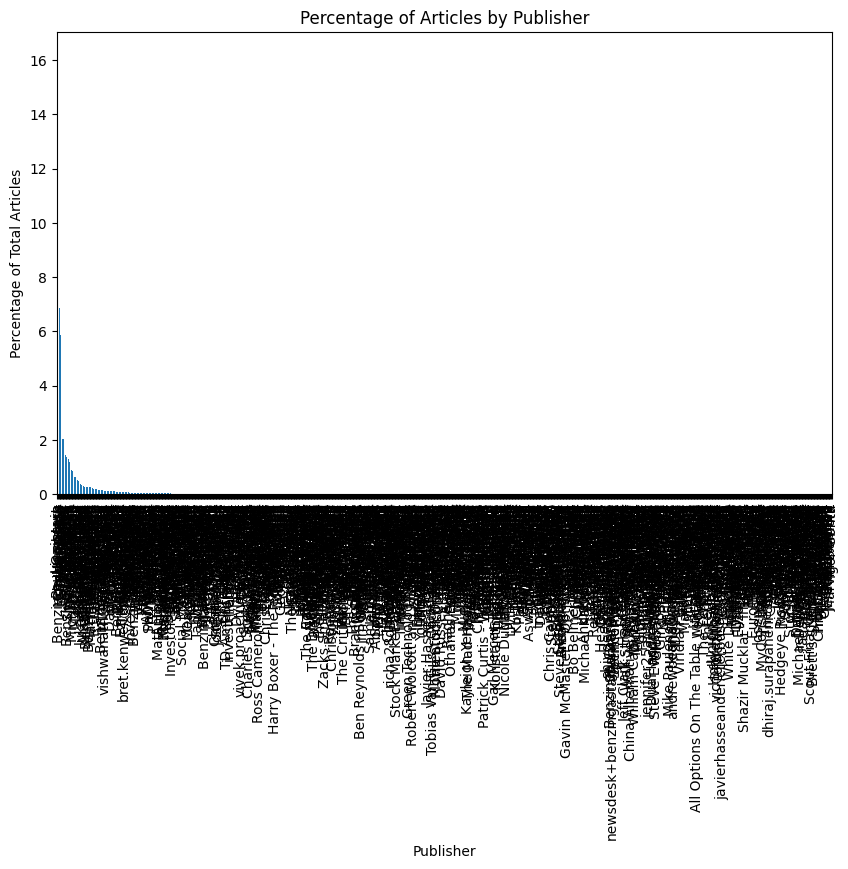

In [62]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()

# Calculate the percentage contribution of each publisher
publisher_percentage = (publisher_counts / publisher_counts.sum()) * 100

# plot the publisher contributions
plt.figure(figsize=(10, 6))
publisher_percentage.plot(kind='bar', title='Percentage of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Percentage of Total Articles')
plt.show()

this doesn't look readable to give you idea of what it looks like , let's try it again on smaller data

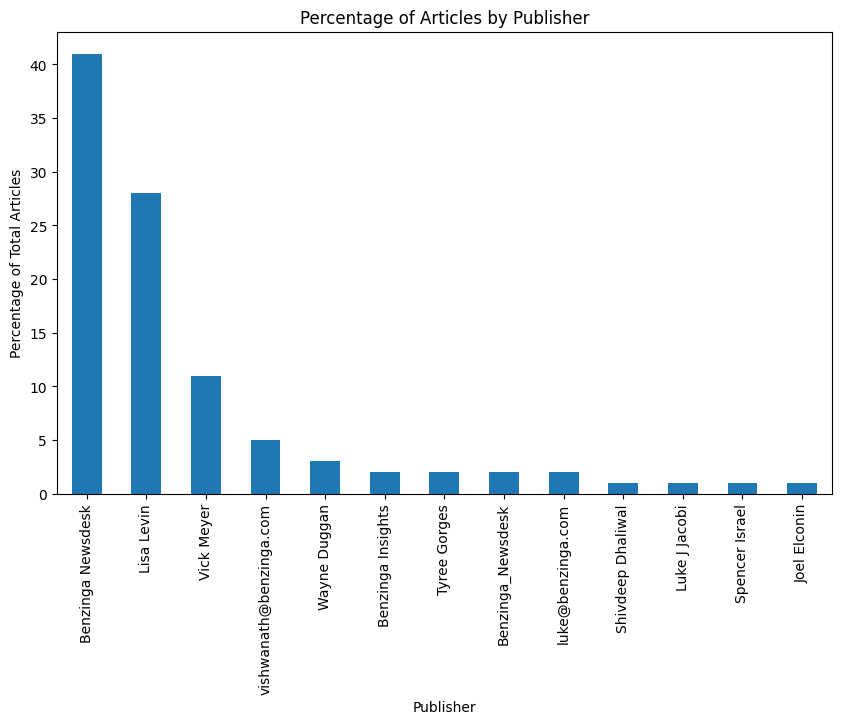

In [63]:
# Count the number of articles per publisher for the first 100 rows
publisher_counts = data['publisher'].head(100).value_counts()

# Calculate the percentage contribution of each publisher
publisher_percentage = (publisher_counts / publisher_counts.sum()) * 100

# Plot the publisher contributions
plt.figure(figsize=(10, 6))
publisher_percentage.plot(kind='bar', title='Percentage of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Percentage of Total Articles')
plt.show()

# Domain Analysis for Publisher Names
Lets extract domains from publisher email addresses and analyze their contributions.

In [64]:
# Extract domain from email addresses 
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count the number of articles per domain
domain_counts = data['domain'].value_counts()

domain_counts


domain
Paul Quintaro                                     228373
Lisa Levin                                        186979
Benzinga Newsdesk                                 150484
Charles Gross                                      96732
Monica Gerson                                      82380
Eddie Staley                                       57254
Hal Lindon                                         49047
ETF Professor                                      28489
Juan Lopez                                         28438
Benzinga Staff                                     28114
Vick Meyer                                         24826
webmaster                                          20313
Benzinga_Newsdesk                                  19410
Zacks                                              19390
Jayson Derrick                                     19050
Allie Wickman                                      18317
Shanthi Rexaline                                   16640
Craig Jones             